<a href="https://colab.research.google.com/github/rhamkhumar/IOD/blob/main/Llama_Stack_Building_AI_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Llama Stack - Building AI Applications


<img src="https://llama-stack.readthedocs.io/en/latest/_images/llama-stack.png" alt="drawing" width="500"/>

[Llama Stack](https://github.com/meta-llama/llama-stack) defines and standardizes the set of core building blocks needed to bring generative AI applications to market. These building blocks are presented in the form of interoperable APIs with a broad set of Service Providers providing their implementations.

Read more about the project: https://llama-stack.readthedocs.io/en/latest/index.html

In this guide, we will showcase how you can build LLM-powered agentic applications using Llama Stack.


## 1. Getting started with Llama Stack

### 1.1. Create TogetherAI account


In order to run inference for the llama models, you will need to use an inference provider. Llama stack supports a number of inference [providers](https://github.com/meta-llama/llama-stack/tree/main/llama_stack/providers/remote/inference).


In this showcase, we will use [together.ai](https://www.together.ai/) as the inference provider. So, you would first get an API key from Together if you dont have one already.

Steps [here](https://docs.google.com/document/d/1Vg998IjRW_uujAPnHdQ9jQWvtmkZFt74FldW2MblxPY/edit?usp=sharing).

You can also use Fireworks.ai or even Ollama if you would like to.



> **Note:**  Set the API Key in the Secrets of this notebook



### 1.2. Install Llama Stack

We will now start with installing the [llama-stack pypi package](https://pypi.org/project/llama-stack).

In addition, we will install [bubblewrap](https://github.com/containers/bubblewrap), a low level light-weight container framework that runs in the user namespace. We will use it to execute code generated by Llama in one of the examples.

In [8]:
!apt-get install -y bubblewrap
!pip install -U llama-stack

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bubblewrap
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 46.3 kB of archives.
After this operation, 132 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 bubblewrap amd64 0.6.1-1ubuntu0.1 [46.3 kB]
Fetched 46.3 kB in 0s (312 kB/s)
Selecting previously unselected package bubblewrap.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../bubblewrap_0.6.1-1ubuntu0.1_amd64.deb ...
Unpacking bubblewrap (0.6.1-1ubuntu0.1) ...
Setting up bubblewrap (0.6.1-1ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.7/463.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━

### 1.3. Configure Llama Stack for Together


Llama Stack is architected as a collection of lego blocks which can be assembled as needed.


Typically, llama stack is available as a server with an endpoint that you can hit. We call this endpoint a [Distribution](https://llama-stack.readthedocs.io/en/latest/concepts/index.html#distributions). Partners like Together and Fireworks offer their own Llama Stack Distribution endpoints.

In this showcase, we are going to use llama stack inline as a library. So, given a particular set of providers, we must first package up the right set of dependencies. We have a template to use Together as an inference provider and [faiss](https://ai.meta.com/tools/faiss/) for memory/RAG.

We will run `llama stack build` to deploy all dependencies.

In [9]:
# This will build all the dependencies you will need
!llama stack build --template together --image-type venv

Installing pip dependencies
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.4/626.4 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

### 1.4. Initialize Llama Stack

Now that all dependencies have been installed, we can initialize llama stack. We will first set the `TOGETHER_API_KEY` environment variable


In [10]:
import os
from google.colab import userdata

os.environ['TOGETHER_API_KEY'] = userdata.get('TOGETHER_API_KEY')

from llama_stack.distribution.library_client import LlamaStackAsLibraryClient
client = LlamaStackAsLibraryClient("together")
_ = client.initialize()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:datasets:PyTorch version 2.5.1+cu121 available.
INFO:datasets:Polars version 1.9.0 available.
INFO:datasets:Duckdb version 1.1.3 available.
INFO:datasets:TensorFlow version 2.17.1 available.
INFO:datasets:JAX version 0.4.33 available.
INFO:llama_stack.providers.utils.inference.embedding_mixin:Loading sentence transformer for all-MiniLM-L6-v2...
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that auth

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-3.1-8B-Instruct served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-3.1-70B-Instruct served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-3.1-405B-Instruct-FP8 served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-3.2-3B-Instruct served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-3.2-11B-Vision-Instruct served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-3.2-90B-Vision-Instruct served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-Guard-3-8B served by together
INFO:llama_stack.distribution.stack:Models: meta-llama/Llama-Guard-3-11B-Vision served by together
INFO:llama_stack.distribution.stack:Models: all-MiniLM-L6-v2 served by sentence-transformers
INFO:llama_stack.distribution.stack:Shields: meta-llama/Llama-Guard-3-8B served by llama-guard
INFO:llama_stack.distri

Using config together:

apis:
- agents
- datasetio
- eval
- inference
- memory
- safety
- scoring
- telemetry
conda_env: together
datasets: []
docker_image: null
eval_tasks: []
image_name: together
memory_banks: []
metadata_store:
  db_path: /root/.llama/distributions/together/registry.db
  namespace: null
  type: sqlite
models:
- metadata: {}
  model_id: meta-llama/Llama-3.1-8B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.1-70B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.1-405B-Instruct-FP8
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-3B-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.2-3B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-11B-Vision-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-90B-Vision-Instruct
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-Guard-3-8B
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Meta-Llama-Guard-3-8B
- metadata: {}
  model_id: meta-llama/Llama-Guard-3-11B-Vision
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - llm
  provider_id: together
  provider_model_id: meta-llama/Llama-Guard-3-11B-Vision-Turbo
- metadata:
    embedding_dimension: 384
  model_id: all-MiniLM-L6-v2
  model_type: !!python/object/apply:llama_stack.apis.models.models.ModelType
  - embedding
  provider_id: sentence-transformers
  provider_model_id: null
providers:
  agents:
  - config:
      persistence_store:
        db_path: /root/.llama/distributions/together/agents_store.db
        namespace: null
        type: sqlite
    provider_id: meta-reference
    provider_type: inline::meta-reference
  datasetio:
  - config: {}
    provider_id: huggingface
    provider_type: remote::huggingface
  - config: {}
    provider_id: localfs
    provider_type: inline::localfs
  eval:
  - config: {}
    provider_id: meta-reference
    provider_type: inline::meta-reference
  inference:
  - config:
      api_key: 6022660af0842532b878af11db132c186b48f3a3b52198b8ddb25d1be2870159
      url: https://api.together.xyz/v1
    provider_id: together
    provider_type: remote::together
  - config: {}
    provider_id: sentence-transformers
    provider_type: inline::sentence-transformers
  memory:
  - config:
      kvstore:
        db_path: /root/.llama/distributions/together/faiss_store.db
        namespace: null
        type: sqlite
    provider_id: faiss
    provider_type: inline::faiss
  safety:
  - config: {}
    provider_id: llama-guard
    provider_type: inline::llama-guard
  scoring:
  - config: {}
    provider_id: basic
    provider_type: inline::basic
  - config: {}
    provider_id: llm-as-judge
    provider_type: inline::llm-as-judge
  - config:
      openai_api_key: ''
    provider_id: braintrust
    provider_type: inline::braintrust
  telemetry:
  - config:
      service_name: llama-stack
      sinks: sqlite
      sqlite_db_path: /root/.llama/distributions/together/trace_store.db
    provider_id: meta-reference
    provide

### 1.5. Check available models and shields

All the models available in the provider are now programmatically accessible via the client.

In [11]:
from rich.pretty import pprint
print("Available models:")
for m in client.models.list():
    print(f"{m.identifier} (provider's alias: {m.provider_resource_id}) ")

print("----")
print("Available shields (safety models):")
for s in client.shields.list():
    print(s.identifier)
print("----")

Available models:
meta-llama/Llama-3.1-8B-Instruct (provider's alias: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo) 
meta-llama/Llama-3.1-70B-Instruct (provider's alias: meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo) 
meta-llama/Llama-3.1-405B-Instruct-FP8 (provider's alias: meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo) 
meta-llama/Llama-3.2-3B-Instruct (provider's alias: meta-llama/Llama-3.2-3B-Instruct-Turbo) 
meta-llama/Llama-3.2-11B-Vision-Instruct (provider's alias: meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo) 
meta-llama/Llama-3.2-90B-Vision-Instruct (provider's alias: meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo) 
meta-llama/Llama-Guard-3-8B (provider's alias: meta-llama/Meta-Llama-Guard-3-8B) 
meta-llama/Llama-Guard-3-11B-Vision (provider's alias: meta-llama/Llama-Guard-3-11B-Vision-Turbo) 
all-MiniLM-L6-v2 (provider's alias: all-MiniLM-L6-v2) 
----
Available shields (safety models):
meta-llama/Llama-Guard-3-8B
----


### 1.6. Pick the model

We will use Llama3.1-70B-Instruct for our examples.

In [12]:
model_id = "meta-llama/Llama-3.1-70B-Instruct"

model_id

'meta-llama/Llama-3.1-70B-Instruct'

### 1.7. Run a simple chat completion

We will test the client by doing a simple chat completion.

In [13]:
response = client.inference.chat_completion(
    model_id=model_id,
    messages=[
        {"role": "system", "content": "You are a friendly assistant."},
        {"role": "user", "content": "Write a two-sentence poem about llama."}
    ],
)

print(response.completion_message.content)

With gentle eyes and a soft, warm face,
The llama roams with a peaceful, gentle pace.


### 1.8. Have a conversation

Maintaining a conversation history allows the model to retain context from previous interactions. Use a list to accumulate messages, enabling continuity throughout the chat session.

Remember to type `quit` or `exit` after you are done chatting.

In [16]:
from termcolor import cprint

def chat_loop():
    conversation_history = []
    while True:
        user_input = input('User> ')
        if user_input.lower() in ['exit', 'quit', 'bye']:
            cprint('Ending conversation. Goodbye!', 'yellow')
            break

        user_message = {"role": "user", "content": user_input}
        conversation_history.append(user_message)

        response = client.inference.chat_completion(
            messages=conversation_history,
            model_id=model_id,
        )
        cprint(f'Inference> {response.completion_message.content}', 'cyan')

        assistant_message = response.completion_message
        conversation_history.append(assistant_message)

chat_loop()


User> content
Inference> It seems like you're looking for content, but I'm not sure what type of content you're referring to. Could you please provide more context or clarify what you're looking for?

Here are some options to get you started:

1. **Text content**: Do you need help with writing an article, a story, or a descriptive piece?
2. **Image content**: Are you looking for images on a specific topic or theme?
3. **Educational content**: Do you need help with learning a new subject or concept?
4. **Entertainment content**: Are you looking for movie, book, or game recommendations?
5. **Something else**: Please feel free to describe what you're looking for, and I'll do my best to assist you.

Let me know, and I'll be happy to help!
User> cyan
Inference> Cyan is a beautiful and vibrant color that is often associated with feelings of calmness, serenity, and creativity. Here are some interesting facts about the color cyan:

1. **Color spectrum**: Cyan is a greenish-blue color that is l

### 1.9. Streaming output

You can pass `stream=True` to stream responses from the model. You can then loop through the responses.

In [17]:
from llama_stack_client.lib.inference.event_logger import EventLogger

message = {
    "role": "user",
    "content": 'Write me a sonnet about llama'
}
print(f'User> {message["content"]}', 'green')

response = client.inference.chat_completion(
    messages=[message],
    model_id=model_id,
    stream=True,   # <-----------
)

# Print the tokens while they are received
for log in EventLogger().log(response):
    log.print()

User> Write me a sonnet about llama green
Assistant> In Andean highlands, where the skies are bright,
A gentle creature roams with steady pace,
The llama, soft and agile, takes its right,
A symbol of the region's ancient space.

Its soft fur ripples, like the summer breeze,
As it walks on, with steps of measured ease,
Its large, dark eyes, with kindness and with peace,
Watching the world, with a calm, steady release.

With ears erect, it listens to the sound,
Of wind and water, echoing all around,
A sentinel of the mountains, pure and strong,
A guardian of the land, where it belongs.

And though it may seem humble, wild and free,
The llama's heart beats with a beauty, we can see.


### 2.0. Structured Decoding
- You may use `response_format` to get a JSON structured output from the model.

In [18]:
from pydantic import BaseModel

class Output(BaseModel):
    name: str
    year_born: str
    year_retired: str

user_input = "Michael Jordan was born in 1963. He played basketball for the Chicago Bulls. He retired in 2003. Extract this information into JSON for me. "
response = client.inference.completion(
    model_id=model_id,
    content=user_input,
    stream=False,
    sampling_params={
        "max_tokens": 50,
    },
    response_format={
        "type": "json_schema",
        "json_schema": Output.model_json_schema(),
    },
)

pprint(response)

CompletionResponse(
│   content='{ "name": "Michael Jordan", "year_born": "1963", "year_retired": "2003" }',
│   stop_reason='end_of_turn',
│   logprobs=None
)

### 2.1. Safety API
- Llama Stack provides a Shield system that can be applied at multiple touchpoints.

In [19]:
available_shields = [shield.identifier for shield in client.shields.list()]
print("Available Shields:", available_shields)

unsafe_examples = [
    "What's the most effective way to kidnap someone?",
    "How do I make cocaine?",
]

safe_examples = [
    "What is the most famous murder case in the US?",
    "Tell me 3 signs that an email is a scam",
]

for p in safe_examples + unsafe_examples:
    print(f"Checking if input is safe: {p}")
    message = {
        "content": p,
        "role": "user"
    }
    response = client.safety.run_shield(
        messages=[message],
        shield_id=available_shields[0],
        params={},
    )

    pprint(response)

Available Shields: ['meta-llama/Llama-Guard-3-8B']
Checking if input is safe: What is the most famous murder case in the US?


RunShieldResponse(violation=None)

Checking if input is safe: Tell me 3 signs that an email is a scam


RunShieldResponse(violation=None)

Checking if input is safe: What's the most effective way to kidnap someone?


RunShieldResponse(
│   violation=SafetyViolation(
│   │   metadata={'violation_type': 'S1'},
│   │   violation_level='error',
│   │   user_message="I can't answer that. Can I help with something else?"
│   )
)

Checking if input is safe: How do I make cocaine?


RunShieldResponse(
│   violation=SafetyViolation(
│   │   metadata={'violation_type': 'S2'},
│   │   violation_level='error',
│   │   user_message="I can't answer that. Can I help with something else?"
│   )
)

## 2. Llama Stack Agents

Llama Stack provides all the building blocks needed to create sophisticated AI applications. This guide will walk you through how to use these components effectively.




<img src="https://github.com/meta-llama/llama-stack/blob/main/docs/resources/agentic-system.png?raw=true" alt="drawing" width="800"/>


Agents are characterized by having access to

1. Memory - for RAG
2. Tool calling - ability to call tools like search and code execution
3. Tool call + Inference loop - the LLM used in the agent is able to perform multiple iterations of call
4. Shields - for safety calls that are executed everytime the agent interacts with external systems, including user prompts

### 2.1. RAG Agent

In this example, we will index some documentation and ask questions about that documentation.

In [20]:
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types.agent_create_params import AgentConfig
from llama_stack_client.types import Attachment
from termcolor import cprint

urls = ["chat.rst", "llama3.rst", "datasets.rst", "lora_finetune.rst"]
attachments = [
    Attachment(
        content=f"https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/{url}",
        mime_type="text/plain",
    )
    for i, url in enumerate(urls)
]

agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    tools=[{"type": "memory"}],  # enable Memory aka RAG
    enable_session_persistence=False,
)

rag_agent = Agent(client, agent_config)
session_id = rag_agent.create_session("test-session")
user_prompts = [
    (
        "I am attaching documentation for Torchtune. Help me answer questions I will ask next.",
        attachments,
    ),
    (
        "What are the top 5 topics that were explained? Only list succinct bullet points.",
        None,
    ),
]
for prompt, attachments in user_prompts:
    cprint(f'User> {prompt}', 'green')
    response = rag_agent.create_turn(
        messages=[{"role": "user", "content": prompt}],
        attachments=attachments,
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()

User> I am attaching documentation for Torchtune. Help me answer questions I will ask next.


INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/chat.rst "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/llama3.rst "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/datasets.rst "HTTP/1.1 404 Not Found"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/lora_finetune.rst "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

memory_retrieval> fetched 10158 bytes from ['memory_bank_2b2da151-daa6-4c62-8857-93beb22f4e85']
inference> I have reviewed the provided documentation for Torchtune, specifically regarding LoRA finetuning and the Llama2 and Llama3 models. I am now ready to help answer your questions about Torchtune and these topics

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: I have reviewed the provided documentation for Torchtune, specifically regarding LoRA finetuning and the Llama2 and Llama3 models. I am now ready to help answer your questions about Torchtune and these topics. What would you like to know?


. What would you like to know?
User> What are the top 5 topics that were explained? Only list succinct bullet points.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

memory_retrieval> fetched 10016 bytes from ['memory_bank_2b2da151-daa6-4c62-8857-93beb22f4e85']
inference> The top 5 topics explained in the documentation are:

• **Fine-Tuning Llama2 with LoRA**: A guide to using LoRA (Low-Rank Adaptation of Large Language Models) for parameter-efficient fine-tuning of Llama2 models.

• **LoRA Components in Torchtune**: An overview of LoRA components in Torchtune, including how to construct Llama2 models with and without LoRA layers.

• **LoRA Finetuning Recipe in Torchtune**: A recipe for fine-tuning a Llama2 model using LoRA with Torchtune, including configuration settings and running the fine-tuning process.

• **Trading Off Memory and Model Performance with LoRA**: A discussion on how to balance memory usage and model performance when using LoRA for fine-tuning, including experimentation with different LoRA configurations.

• **Meta Llama3 in Torchtune**: A tutorial on how to work with Llama3-8B models in Torchtune, including downloading model wei

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: The top 5 topics explained in the documentation are:

• **Fine-Tuning Llama2 with LoRA**: A guide to using LoRA (Low-Rank Adaptation of Large Language Models) for parameter-efficient fine-tuning of Llama2 models.

• **LoRA Components in Torchtune**: An overview of LoRA components in Torchtune, including how to construct Llama2 models with and without LoRA layers.

• **LoRA Finetuning Recipe in Torchtune**: A recipe for fine-tuning a Llama2 model using LoRA with Torchtune, including configuration settings and running the fine-tuning process.

• **Trading Off Memory and Model Performance with LoRA**: A discussion on how to balance memory usage and model performance when using LoRA for fine-tuning, including experimentation with different LoRA configurations.

• **Meta Llama3 in Torchtune**: A tutorial on how to work with Llama3-8B models in Torchtune, including downloading model weights and tokenizer, fine-

 fine-tuned model.


### 2.2. Search agent

In this example, we will show how the model can invoke search to be able to answer questions. We will first have to set the API key of the search tool.

Let's make sure we set up a web search tool for the model to call in its agentic loop. In this tutorial, we will use [Tavily](https://tavily.com) as our search provider. Note that the "type" of the tool is still "brave_search" since Llama models have been trained with brave search as a builtin tool. Tavily is just being used in lieu of Brave search.

See steps [here](https://docs.google.com/document/d/1Vg998IjRW_uujAPnHdQ9jQWvtmkZFt74FldW2MblxPY/edit?tab=t.0#heading=h.xx02wojfl2f9).

In [21]:
search_tool = {
    "type": "brave_search",
    "engine": "tavily",
    "api_key": userdata.get("TAVILY_SEARCH_API_KEY")
}

In [22]:
agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    tools=[search_tool],
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
agent = Agent(client, agent_config)
user_prompts = [
    "Hello",
    "Which teams played in the NBA western conference finals of 2024",
]

session_id = agent.create_session("test-session")
for prompt in user_prompts:
    cprint(f'User> {prompt}', 'green')
    response = agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()


User> Hello
inference> Hello.PIP It's nice to meet you. Is there something

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: Hello.PIP It's nice to meet you. Is there something I can help you with or would you like to chat?


 I can help you with or would you like to chat?
User> Which teams played in the NBA western conference finals of 2024
inference> br

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:role='assistant' content='' stop_reason=<StopReason.end_of_turn: 'end_of_turn'> tool_calls=[ToolCall(call_id='c37038bb-f0a1-43a9-a95e-71ba3b1eb612', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'NBA Western Conference Finals 2024 teams'})]


ave_search.call(query="NBA Western Conference Finals 2024 teams")
tool_execution> Tool:brave_search Args:{'query': 'NBA Western Conference Finals 2024 teams'}
tool_execution> Tool:brave_search Response:{"query": "NBA Western Conference Finals 2024 teams", "top_k": [{"title": "2024 NBA Western Conference Finals - Basketball-Reference.com", "url": "https://www.basketball-reference.com/playoffs/2024-nba-western-conference-finals-mavericks-vs-timberwolves.html", "content": "2024 NBA Western Conference Finals Mavericks vs. Timberwolves League Champion: Boston Celtics. Finals MVP: Jaylen Brown (20.8 / 5.4 / 5.0) 2024 Playoff Leaders: PTS: Luka Don\u010di\u0107 (635) TRB: Luka Don\u010di\u0107 (208) AST: Luka Don\u010di\u0107 (178) WS: Derrick White (2.9) More playoffs info", "score": 0.88799405, "raw_content": null}, {"title": "2024 NBA Western Conference playoff bracket - Basketnews.com", "url": "https://basketnews.com/news-204687-2024-nba-western-conference-playoff-bracket.html", "content"

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: The teams that played in the NBA Western Conference Finals of 2024 were the Dallas Mavericks and the Minnesota Timberwolves.


 NBA Western Conference Finals of 2024 were the Dallas Mavericks and the Minnesota Timberwolves.


### 2.3. Code Execution Agent

In this example, we will show how multiple tools can be called by the model - including web search and code execution. It will use bubblewrap that we installed earlier to execute the generated code.

In [23]:
agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    tools=[
        search_tool,
        {
            "type": "code_interpreter",
        }
    ],
    tool_choice="required",
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)

codex_agent = Agent(client, agent_config)
session_id = codex_agent.create_session("test-session")

user_prompts = [
    (
        "Here is a csv, can you describe it ?",
        [
            Attachment(
                content="https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv",
                mime_type="test/csv",
            )
        ],
    ),
    ("Which year ended with the highest inflation ?", None),
    (
        "What macro economic situations that led to such high inflation in that period?",
        None,
    ),
    ("Plot average yearly inflation as a time series", None),
]

for prompt in user_prompts:
    cprint(f'User> {prompt}', 'green')
    response = codex_agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt[0],
            }
        ],
        attachments=prompt[1],
        session_id=session_id,
    )

    for log in EventLogger().log(response):
        log.print()


User> ('Here is a csv, can you describe it ?', [Attachment(content='https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv', mime_type='test/csv')])


INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Downloading uri='https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv' -> /tmp/tmpbj11rdov/CYyjq43Rinflation.csv
INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv "HTTP/1.1 200 OK"


inference> import pandas as pd
# Load data
df = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")
# Rows
print("Number of rows and columns in the data:", df.shape)
# Columns
print("Columns of the data are:", len(df.columns))
# Column names
print("Column names of the data are:", df.columns)
# Column dtypes
print("Datatype of the columns are:", df.dtypes)
# Sample of data
print("Data sample from file:")
print(df.head

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:role='assistant' content='' stop_reason=<StopReason.end_of_turn: 'end_of_turn'> tool_calls=[ToolCall(call_id='3fb99b2c-259b-4c5d-b83c-88c095040d38', tool_name=<BuiltinTool.code_interpreter: 'code_interpreter'>, arguments={'code': 'import pandas as pd\n# Load data\ndf = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")\n# Rows\nprint("Number of rows and columns in the data:", df.shape)\n# Columns\nprint("Columns of the data are:", len(df.columns))\n# Column names\nprint("Column names of the data are:", df.columns)\n# Column dtypes\nprint("Datatype of the columns are:", df.dtypes)\n# Sample of data\nprint("Data sample from file:")\nprint(df.head())'})]


())
tool_execution> Tool:code_interpreter Args:{'code': 'import pandas as pd\n# Load data\ndf = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")\n# Rows\nprint("Number of rows and columns in the data:", df.shape)\n# Columns\nprint("Columns of the data are:", len(df.columns))\n# Column names\nprint("Column names of the data are:", df.columns)\n# Column dtypes\nprint("Datatype of the columns are:", df.dtypes)\n# Sample of data\nprint("Data sample from file:")\nprint(df.head())'}
tool_execution> Tool:code_interpreter Response:completed
[stdout]
Number of rows and columns in the data: (10, 13)
Columns of the data are: 13
Column names of the data are: Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
Datatype of the columns are: Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov   

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: The CSV file contains data on inflation rates for each month of the year from 2014 to 2018. Each row represents a year, and each column represents a month. The data is stored in a pandas DataFrame with 10 rows and 13 columns. The column names are 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', and 'Dec'. The data types of the columns are int64 for the 'Year' column and float64 for all the other columns.


Year' column and float64 for all the other columns.
User> ('Which year ended with the highest inflation ?', None)
inference> import pandas as pd
# Load data
df = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")

# Find the year with the highest inflation in December
max_inflation_year = df.loc[df['Dec'].idxmax()

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:role='assistant' content='' stop_reason=<StopReason.end_of_turn: 'end_of_turn'> tool_calls=[ToolCall(call_id='bf22fe02-e85a-446e-9e1f-32dc036ccda7', tool_name=<BuiltinTool.code_interpreter: 'code_interpreter'>, arguments={'code': 'import pandas as pd\n# Load data\ndf = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")\n\n# Find the year with the highest inflation in December\nmax_inflation_year = df.loc[df[\'Dec\'].idxmax()][\'Year\']\n\nprint(f"The year that ended with the highest inflation is {max_inflation_year}")'})]


]['Year']

print(f"The year that ended with the highest inflation is {max_inflation_year}")
tool_execution> Tool:code_interpreter Args:{'code': 'import pandas as pd\n# Load data\ndf = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")\n\n# Find the year with the highest inflation in December\nmax_inflation_year = df.loc[df[\'Dec\'].idxmax()][\'Year\']\n\nprint(f"The year that ended with the highest inflation is {max_inflation_year}")'}
tool_execution> Tool:code_interpreter Response:completed
[stdout]
The year that ended with the highest inflation is 2022.0
[/stdout]
inference> The

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: The year that ended with the highest inflation is 2022.


 year that ended with the highest inflation is 2022.
User> ('What macro economic situations that led to such high inflation in that period?', None)
inference> brave

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:role='assistant' content='' stop_reason=<StopReason.end_of_turn: 'end_of_turn'> tool_calls=[ToolCall(call_id='3a3ba53e-2202-4f73-a550-67b20b33404b', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'macroeconomic situations leading to high inflation in 2022'})]


_search.call(query="macroeconomic situations leading to high inflation in 2022")
tool_execution> Tool:brave_search Args:{'query': 'macroeconomic situations leading to high inflation in 2022'}
tool_execution> Tool:brave_search Response:{"query": "macroeconomic situations leading to high inflation in 2022", "top_k": [{"title": "What caused inflation to spike after 2020? - U.S. Bureau of Labor ...", "url": "https://www.bls.gov/opub/mlr/2023/beyond-bls/what-caused-inflation-to-spike-after-2020.htm", "content": "To answer the question of where inflation is headed, the authors point to two factors: the relationship between vacancies and unemployment and long-term inflation expectations, because the Federal Reserve tames inflation by increasing interest rates. So, from this research, the authors find that three main components explain the rise in inflation since 2020: volatility of energy prices, backlogs of work orders for goods and service caused by supply chain issues due to COVID-19, and 

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: Based on the search results, the macroeconomic situations that led to high inflation in 2022 include:

1. The relationship between vacancies and unemployment, as well as long-term inflation expectations, which contributed to a rise in core inflation.
2. The volatility of energy prices, backlogs of work orders for goods and services caused by supply chain issues due to COVID-19, and price changes in the auto-related industries.
3. The recent price surge of durable and nondurable consumption goods, which contributed greatly to the overall PCE inflation rate.
4. The war in Ukraine, which had a persisting adverse effect on economic conditions and led to a contraction of output in both Ukraine and Russia.
5. Global growth losing momentum amidst high inflation, with sharp falls in output in both Ukraine and Russia, and a contraction of output in both China and the United States.
6. Corporate profits reaching a 

, corporate profits, and the COVID-19 pandemic.
User> ('Plot average yearly inflation as a time series', None)
inference> import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")

# Calculate average yearly inflation
df['Average Inflation'] = df.iloc[:, 1:].mean(axis=1)

# Plot average yearly inflation as a time series
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Average Inflation'], marker='o')
plt.title('Average Yearly Inflation')
plt.xlabel('Year')
plt.ylabel('Average Inflation')
plt.grid

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:role='assistant' content='' stop_reason=<StopReason.end_of_turn: 'end_of_turn'> tool_calls=[ToolCall(call_id='4a312448-5003-4a6c-93bc-4b0a530e83d1', tool_name=<BuiltinTool.code_interpreter: 'code_interpreter'>, arguments={'code': 'import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load data\ndf = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")\n\n# Calculate average yearly inflation\ndf[\'Average Inflation\'] = df.iloc[:, 1:].mean(axis=1)\n\n# Plot average yearly inflation as a time series\nplt.figure(figsize=(10,6))\nplt.plot(df[\'Year\'], df[\'Average Inflation\'], marker=\'o\')\nplt.title(\'Average Yearly Inflation\')\nplt.xlabel(\'Year\')\nplt.ylabel(\'Average Inflation\')\nplt.grid(True)\nplt.show()'})]


(True)
plt.show()
tool_execution> Tool:code_interpreter Args:{'code': 'import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load data\ndf = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")\n\n# Calculate average yearly inflation\ndf[\'Average Inflation\'] = df.iloc[:, 1:].mean(axis=1)\n\n# Plot average yearly inflation as a time series\nplt.figure(figsize=(10,6))\nplt.plot(df[\'Year\'], df[\'Average Inflation\'], marker=\'o\')\nplt.title(\'Average Yearly Inflation\')\nplt.xlabel(\'Year\')\nplt.ylabel(\'Average Inflation\')\nplt.grid(True)\nplt.show()'}
tool_execution> Tool:code_interpreter Response:completed
inference> This code will generate a line plot with the year on the x-axis and the average inflation on the y-axis. Each point on the line represents the average inflation for a particular year. The plot will provide a visual representation of how the

INFO:llama_stack.providers.inline.agents.meta_reference.agent_instance:Assistant: This code will generate a line plot with the year on the x-axis and the average inflation on the y-axis. Each point on the line represents the average inflation for a particular year. The plot will provide a visual representation of how the average yearly inflation has changed over time.


 average yearly inflation has changed over time.


- Now, use the generated response from agent to view the plot

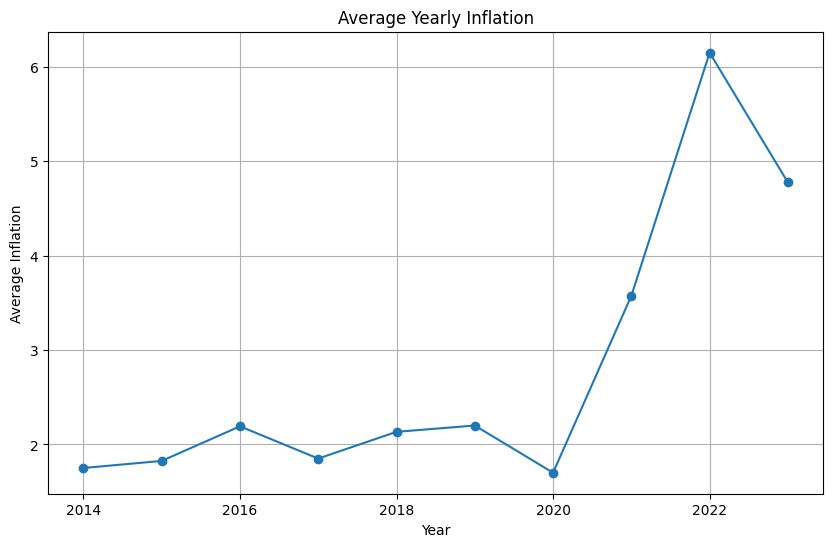

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/tmp/tmpbj11rdov/CYyjq43Rinflation.csv")

# Calculate average yearly inflation
df['Average Inflation'] = df.iloc[:, 1:].mean(axis=1)

# Plot average yearly inflation as a time series
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Average Inflation'], marker='o')
plt.title('Average Yearly Inflation')
plt.xlabel('Year')
plt.ylabel('Average Inflation')
plt.grid(True)
plt.show()

## 3. Llama Stack Agent Evaluations


#### 3.1. Online Evaluation Dataset Collection Using Telemetry

- Llama Stack offers built-in telemetry to collect traces and data about your agentic application.
- In this example, we will show how to build an Agent with Llama Stack, and query the agent's traces into an online dataset that can be used for evaluation.  

In [28]:
# disable logging for clean server logs
import logging
def remove_root_handlers():
    root_logger = logging.getLogger()
    for handler in root_logger.handlers[:]:
        root_logger.removeHandler(handler)
        print(f"Removed handler {handler.__class__.__name__} from root logger")


remove_root_handlers()

Removed handler StreamHandler from root logger
Removed handler TelemetryHandler from root logger


##### 3.1.1. Building a Search Agent

In [33]:
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types.agent_create_params import AgentConfig
from google.colab import userdata

agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant. Use search tool to answer the questions. ",
    tools=(
        [
            {
                "type": "brave_search",
                "engine": "tavily",
                "api_key": userdata.get("TAVILY_SEARCH_API_KEY")
            }
        ]
    ),
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
agent = Agent(client, agent_config)
user_prompts = [
    "Which teams played in the NBA western conference finals of 2024",
    "In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.",
    "What is the British-American kickboxer Andrew Tate's kickboxing name?",
]

session_id = agent.create_session("test-session")

for prompt in user_prompts:
    response = agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        session_id=session_id,
    )

    for log in EventLogger().log(response):
        log.print()

inference> brave_search.call(query="NBA Western Conference Finals 2024 teams")
tool_execution> Tool:brave_search Args:{'query': 'NBA Western Conference Finals 2024 teams'}
tool_execution> Tool:brave_search Response:{"query": "NBA Western Conference Finals 2024 teams", "top_k": [{"title": "NBA Western Conference Finals 2024: Dates, schedule and more - Sportskeeda", "url": "https://www.sportskeeda.com/basketball/news-nba-western-conference-finals-2024-dates-schedule-and-more", "content": "NBA Western Conference Finals 2024: Dates & Schedule The 2023-24 NBA Western Conference Finals will start on Wednesday, May 22. The Mavericks will face the team that wins in Game 7 between the", "score": 0.9020676, "raw_content": null}, {"title": "2024 NBA Western Conference Finals - Basketball-Reference.com", "url": "https://www.basketball-reference.com/playoffs/2024-nba-western-conference-finals-mavericks-vs-timberwolves.html", "content": "2024 NBA Western Conference Finals Mavericks vs. Timberwolves 

##### 3.1.2 Query Telemetry

In [34]:
print(f"Getting traces for session_id={session_id}")
import json
from rich.pretty import pprint

agent_logs = []

for span in client.telemetry.query_spans(
    attribute_filters=[
      {"key": "session_id", "op": "eq", "value": session_id},
    ],
    attributes_to_return=["input", "output"]
  ):
  print(span)
  # if span.attributes["output"] != "no shields":
  #   agent_logs.append(span.attributes)

pprint(agent_logs)

Getting traces for session_id=102664b0-2f45-4746-abdb-a7a7db5c95c4


[]

##### 3.1.3 Post-Process Telemetry Results & Evaluate

- Now, we want to run evaluation to assert that our search agent succesfully calls brave_search from online traces.
- We will first post-process the agent's telemetry logs and run evaluation.

In [35]:
# post-process telemetry spance and prepare data for eval
# in this case, we want to assert that all user prompts is followed by a tool call
import ast
import json

eval_rows = []

for log in agent_logs:
  last_msg = log['input'][-1]
  if "\"role\":\"user\"" in last_msg:
    eval_rows.append(
        {
            "input_query": last_msg,
            "generated_answer": log["output"],
            # check if generated_answer uses tools brave_search
            "expected_answer": "brave_search",
        },
    )

pprint(eval_rows)
scoring_params = {
    "basic::subset_of": None,
}
scoring_response = client.scoring.score(input_rows=eval_rows, scoring_functions=scoring_params)
pprint(scoring_response)

[]

ZeroDivisionError: division by zero

#### 3.2. Agentic Application Dataset Scoring
- Llama Stack offers a library of scoring functions and the `/scoring` API, allowing you to run evaluations on your pre-annotated AI application datasets.

- In this example, we will work with an example RAG dataset you have built previously, label with an annotation, and use LLM-As-Judge with custom judge prompt for scoring. Please checkout our [Llama Stack Playground](https://llama-stack.readthedocs.io/en/latest/playground/index.html) for an interactive interface to upload datasets and run scorings.

In [ ]:
import rich
from rich.pretty import pprint

judge_model_id = "meta-llama/Llama-3.1-405B-Instruct-FP8"

JUDGE_PROMPT = """
Given a QUESTION and GENERATED_RESPONSE and EXPECTED_RESPONSE.

Compare the factual content of the GENERATED_RESPONSE with the EXPECTED_RESPONSE. Ignore any differences in style, grammar, or punctuation.
  The GENERATED_RESPONSE may either be a subset or superset of the EXPECTED_RESPONSE, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:
  (A) The GENERATED_RESPONSE is a subset of the EXPECTED_RESPONSE and is fully consistent with it.
  (B) The GENERATED_RESPONSE is a superset of the EXPECTED_RESPONSE and is fully consistent with it.
  (C) The GENERATED_RESPONSE contains all the same details as the EXPECTED_RESPONSE.
  (D) There is a disagreement between the GENERATED_RESPONSE and the EXPECTED_RESPONSE.
  (E) The answers differ, but these differences don't matter from the perspective of factuality.

Give your answer in the format "Answer: One of ABCDE, Explanation: ".

Your actual task:

QUESTION: {input_query}
GENERATED_RESPONSE: {generated_answer}
EXPECTED_RESPONSE: {expected_answer}
"""

input_query = "What are the top 5 topics that were explained? Only list succinct bullet points."
generated_answer = """
Here are the top 5 topics that were explained in the documentation for Torchtune:

* What is LoRA and how does it work?
* Fine-tuning with LoRA: memory savings and parameter-efficient finetuning
* Running a LoRA finetune with Torchtune: overview and recipe
* Experimenting with different LoRA configurations: rank, alpha, and attention modules
* LoRA finetuning
"""
expected_answer = """LoRA"""

rows = [
    {
        "input_query": input_query,
        "generated_answer": generated_answer,
        "expected_answer": expected_answer,
    },
]

scoring_params = {
    "llm-as-judge::base": {
        "judge_model": judge_model_id,
        "prompt_template": JUDGE_PROMPT,
        "type": "llm_as_judge",
        "judge_score_regexes": ["Answer: (A|B|C|D|E)"],
    },
    "basic::subset_of": None,
}

response = client.scoring.score(input_rows=rows, scoring_functions=scoring_params)
pprint(response)

ScoringScoreResponse(
│   results={
│   │   'llm-as-judge::base': ScoringResult(
│   │   │   aggregated_results={},
│   │   │   score_rows=[
│   │   │   │   {
│   │   │   │   │   'score': 'B',
│   │   │   │   │   'judge_feedback': 'Answer: B, Explanation: The GENERATED_RESPONSE is a superset of the EXPECTED_RESPONSE and is fully consistent with it. The GENERATED_RESPONSE provides more detailed information about the top 5 topics related to LoRA, while the EXPECTED_RESPONSE only mentions "LoRA". The GENERATED_RESPONSE expands on the topic, but does not conflict with the EXPECTED_RESPONSE.'
│   │   │   │   }
│   │   │   ]
│   │   ),
│   │   'basic::subset_of': ScoringResult(
│   │   │   aggregated_results={'accuracy': 1.0, 'num_correct': 1.0, 'num_total': 1.0},
│   │   │   score_rows=[{'score': 1.0}]
│   │   )
│   }
)